In [155]:
import csv
import pandas as pd
import numpy as np

In [ ]:
!pip install plotly

In [174]:
# Titanic Dataset
df = pd.read_csv(r'C:/Users/PornpatSamartlertdee/Desktop/TNI/DSA-304 Big Data Analytics/Assignment 1/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [175]:
# 1) Identify numerical and categorical features
    # Numerical features
numeric_features = [df['Age'], df['Fare'], df['SibSp'], df['Parch']]
    # Categorical Features
categorical_features = [df['Pclass'], df['Sex'], df['Embarked']]

## SibSp = Sibling/Spouse, Parch = Parent/Children

In [177]:
# 2) Data cleaning
    # 2.1) Drop duplicates
df = df.drop_duplicates()
"""0 duplicates """
    # 2.2) Missing values
df.isnull().sum() 
"""
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
"""
    # 2.2.1) Fill numerical attributes with average (Age)
df = df.fillna(df.mean())
    # 2.2.2) Fill categorical attributes with Unknown (Cabin, Embarked)
df['Embarked'].unique()
df = df.fillna('Unknown')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


" \n*** For y-axis, other numerical features like Fare, SibSp, Parch; can also be used, but it might not hold any meaningful knowledge.\nNot survived people (0): about a quarter of each is between 6-22, 22-30, 30-34, 34-52. A small percentage is between 0-6, 52-75.\nSurvived people (1): about a quarter of each is between 0-20, 20-30, 30-33, 33-55. A small percentage is between 55-63. \n                    There's also some outliers at 80.\n"

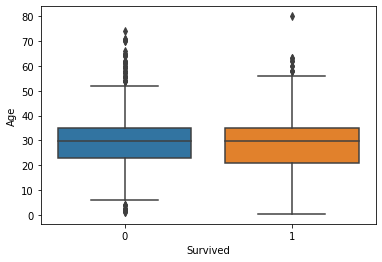

In [159]:
# 3) Data visualization
    # 3.1) Box plot
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
%matplotlib inline
ax = sns.boxplot(x=df['Survived'], y=df['Age'])
""" 
*** For y-axis, other numerical features like Fare, SibSp, Parch; can also be used, but it might not hold any meaningful knowledge.
Not survived people (0): about a quarter of each is between 6-22, 22-30, 30-34, 34-52. A small percentage is between 0-6, 52-75.
Survived people (1): about a quarter of each is between 0-20, 20-30, 30-33, 33-55. A small percentage is between 55-63. 
                    There's also some outliers at 80.
"""

'\nThere are 65% of male and 35% of female in the data.\n19% of male and 74% of female survived in this incident. \n'

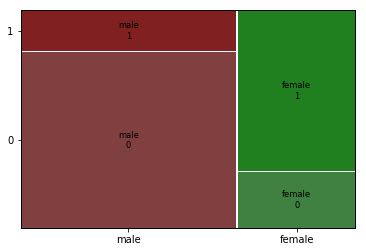

In [160]:
    # 3.2) Mosaic plot
mosaic(df, ['Sex', 'Survived'])
"""
There are 65% of male and 35% of female in the data.
19% of male and 74% of female survived in this incident. 
"""

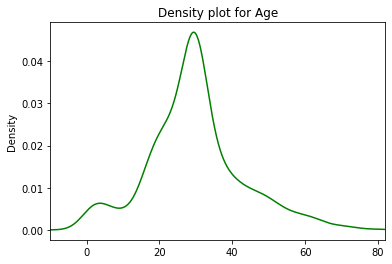

'\nIt shows the probability density function of Age.\nA large percentage of people are about 30s, a medium percentage are about 45s, a low percentage are about 10s, 60s\n'

In [161]:
    # 3.3) Density plot
df['Age'].plot.density(color = 'green', xlim = (-10, 82)) 
plt.title('Density plot for Age') 
plt.show()
"""
It shows the probability density function of Age.
A large percentage of people are about 30s, a medium percentage are about 45s, a low percentage are about 10s, 60s
"""

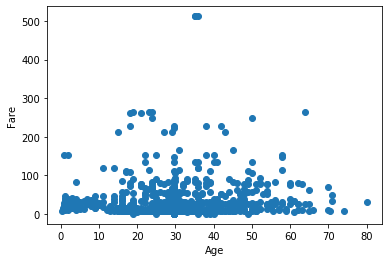

" \nMost of passengers's fare is about 0$ - 50$.\nA medium quantity of grown-up passengers (20s-55s) can afford more than 50$.\n>200$ fare usually bought from 20s -30s\nSome people in their 35s afford 500$ fare\n"

In [162]:
    # 3.4) Scatter plot
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()
""" 
Most of passengers's fare is about 0$ - 50$.
A medium quantity of grown-up passengers (20s-55s) can afford more than 50$.
>200$ fare usually bought from 20s -30s
Some people in their 35s afford 500$ fare
"""

In [179]:
# Car's Miles/Gallon Dataset
cars1 = pd.read_csv(r'C:/Users/PornpatSamartlertdee/Desktop/TNI/DSA-304 Big Data Analytics/Assignment 1/car_mpg_predict-master/cars1.csv')
cars2 = pd.read_csv(r'C:/Users/PornpatSamartlertdee/Desktop/TNI/DSA-304 Big Data Analytics/Assignment 1/car_mpg_predict-master/cars2.csv')
cars1.drop(cars1.columns[9:],axis=1,inplace=True)  
df = cars1.append(cars2)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger


In [180]:
# 1) Identify numerical and categorical features
    # Numerical features
numeric_features = [df['mpg'], df['displacement'], df['weight'], df['acceleration']]
    # Categorical Features
categorical_features = [df['cylinders'], df['model'], df['origin']]

In [181]:
# 2) Data cleaning
    # 2.1) Drop duplicates
df = df.drop_duplicates()
"""0 duplicates """
    # 2.2) Missing values
df.isnull().sum() 
"""
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
car             0
dtype: int64
"""
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger


' \n*** \n    For y-axis, other numerical features, e.g., horsepower, weight; can also be used.\nThe newer the model, miles/gallon is likely to be higher for each model.\n'

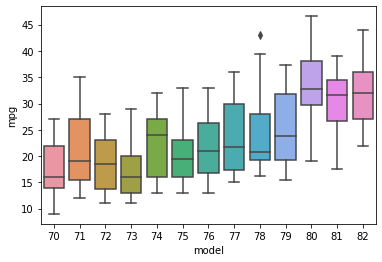

In [166]:
# 3) Data visualization
    # 3.1) Box plot
ax = sns.boxplot(x=df['model'], y=df['mpg'])
""" 
*** 
    For y-axis, other numerical features, e.g., horsepower, weight; can also be used.
The newer the model, miles/gallon is likely to be higher for each model.
"""

"\nMost of models are mostly from origin 1, only model 80 and 81 that the cars aren't majorly from origin 1.\n"

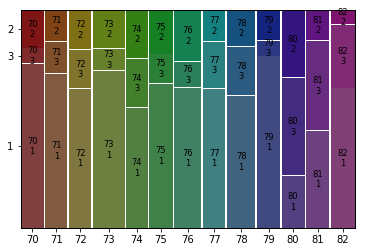

In [167]:
    # 3.2) Mosaic plot
mosaic(df, ['model', 'origin'])
"""
Most of models are mostly from origin 1, only model 80 and 81 that the cars aren't majorly from origin 1.
"""

"\nMiles/gallon of origin 3 is higher than origin 2's and\nMiles/gallon of origin 2 is higher than origin 1's.\nMost of origin 1 cars's mpg mode is at 15 mpg\nMost of origin 2 cars's mpg mode is at 27 mpg\nMost of origin 3 cars's mpg mode is at 33 mpg\n"

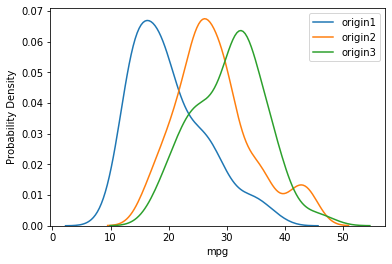

In [170]:
    # 3.3) Density plot
sns.kdeplot(df['mpg'][(df['origin']==1)], Label = 'origin1')
sns.kdeplot(df['mpg'][(df['origin']==2)], Label = 'origin2')
sns.kdeplot(df['mpg'][(df['origin']==3)], Label = 'origin3')
plt.xlabel('mpg') 
plt.ylabel('Probability Density') 
"""
Miles/gallon of origin 3 is higher than origin 2's and
Miles/gallon of origin 2 is higher than origin 1's.
Most of origin 1 cars's mpg mode is at 15 mpg
Most of origin 2 cars's mpg mode is at 27 mpg
Most of origin 3 cars's mpg mode is at 33 mpg
"""

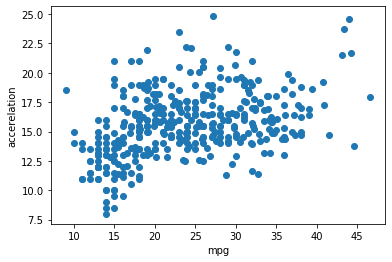

' \nThe higher the mpg, the higher the acceleration.\n'

In [171]:
    # 3.4) Scatter plot
plt.scatter(df['mpg'], df['acceleration'])
plt.xlabel('mpg')
plt.ylabel('accerelation')
plt.show()
""" 
The higher the mpg, the higher the acceleration.
"""